<a href="https://colab.research.google.com/github/iwanaminami/tokuron142024/blob/main/virusdynamics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ウイルス感染のモデル
体内でのウイルス感染を表すモデル  

$$
\begin{cases}
\frac{dT(t)}{dt} = -\beta T(t) V(t) - d T(t)\\
\frac{dI(t)}{dt} = \beta T(t) V(t) - \delta I(t)\\
\frac{dV(t)}{dt} = p I(t) - c V(t)
\end{cases}
$$

## 変数  

$T(t)$: 標的細胞数（未感染細胞数）  
$I(t)$: 感染細胞数（ウイルス産生細胞数）  
$V(t)$: ウイルス量  

## パラメータ

$\beta$: 感染性（感染力）  
$d$: 標的細胞の死亡率  
$\delta$: 感染細胞の除去率（死亡率）  
$p$: 単位感染細胞あたりのウイルス産生量  
$c$: ウイルス除去率

## ウイルス産生を抑制する治療

ウイルス複製阻害、粒子形成阻害などでウイルス産生を抑制する治療を考えると、

$$
\begin{cases}
\frac{dT(t)}{dt} = -\beta T(t) V(t) - d T(t)\\
\frac{dI(t)}{dt} = \beta T(t) V(t) - \delta I(t)\\
\frac{dV(t)}{dt} = (1- \varepsilon)p I(t) - c V(t)
\end{cases}
$$

$\varepsilon$: 阻害効率（0〜1）

In [1]:
# 実行1
# ライブラリの読み込み
# 最初に1回だけ実行

import math
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# 実行2
# データの読み込み
# 最初に1回だけ実行

data_infected = pd.read_csv("https://raw.githubusercontent.com/iwanaminami/tokuron142024/main/data_example.csv")

In [3]:
# 実行3
# 読み込んだデータ

data_infected

,time,TC,IC,VL
0,0,1.089788e+07,0.185303,1.544150e+04
1,2,4.439328e+06,156.780085,3.093638e+05
2,4,1.282267e+07,15411.613197,1.664228e+08
3,6,3.047295e+06,127284.358444,3.048204e+09
4,8,4.364432e+05,532466.278934,7.559037e+10
5,10,8.957487e+04,15820.932198,1.470568e+09
6,12,1.306915e+05,4151.392109,3.203665e+08
7,14,3.342365e+04,261.020365,1.108270e+07
8,16,1.331608e+05,68.062371,1.778516e+06
9,18,8.385856e+05,0.538309,6.031303e+04


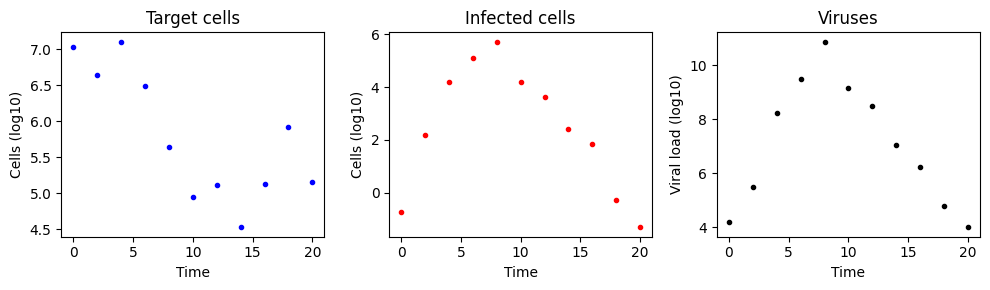

In [16]:
# 実行4
# 全データの確認

fig = plt.figure(figsize=(10,3))

ax = fig.add_subplot(1, 3, 1)
ax.plot(data_infected['time'], np.log10(data_infected['TC']), marker = ".", linestyle = "none", color = "blue")
ax.set_title('Target cells')
ax.set_xlabel('Time')
ax.set_ylabel('Cells (log10)')

ax = fig.add_subplot(1, 3, 2)
ax.plot(data_infected['time'], np.log10(data_infected['IC']), marker = ".", linestyle = "none", color = "red")
ax.set_title('Infected cells')
ax.set_xlabel('Time')
ax.set_ylabel('Cells (log10)')

ax = fig.add_subplot(1, 3, 3)
ax.plot(data_infected['time'], np.log10(data_infected['VL']), marker = ".", linestyle = "none", color = "black")
ax.set_title('Viruses')
ax.set_xlabel('Time')
ax.set_ylabel('Viral load (log10)')

fig.tight_layout()
fig.show()

In [17]:
# 実行5
# 関数の定義（変えない）

def calculate_vd(beta = 8e-11, d = 0.05, delta = 1.8, p = 3e+4, c = 2.0, x0 = 6e+6, y0 = 1e-1, z0 = 5e+4, epsilon = 0.8, epsilon_start = 10000):

  dt = 0.01
  t = 0
  x = x0
  y = y0
  z = z0
  xList = [x]
  yList = [y]
  zList = [z]
  tList = [t]

  for i in range(2000):
      t = dt*(i+1)

      if t < epsilon_start:
        xx = x + dt*(-beta*x*z - d*x)
        yy = y + dt*(beta*x*z - delta*y)
        zz = z + dt*(p*y - c*z)
      else:
        xx = x + dt*(-beta*x*z - d*x)
        yy = y + dt*(beta*x*z - delta*y)
        zz = z + dt*((1 - epsilon)*p*y - c*z)

      x = xx
      y=yy
      z=zz
      tList.append(t)
      xList.append(x)
      yList.append(y)
      zList.append(z)

  return [tList, xList, yList, zList]

def plot_vd(out_vd):

  # プロット

  tList = out_vd[0]

  fig = plt.figure(figsize = (15, 4))

  for i in range(3):

    ax = fig.add_subplot(1, 3, i + 1)

    ax.plot(data_infected['time'], np.log10(data_infected[['TC', 'IC', 'VL'][i]]), marker = ".", linestyle = "none", color = ["blue", "red", "black"][i])
    ax.plot(out_vd[0], np.log10(out_vd[i + 1]), color = ["blue", "red", "black"][i])

    ax.set_title(['Target cells', 'Infected cells', 'Viruses'][i])
    ax.set_xlabel('Time')
    ax.set_ylabel(['Cells (log10)', 'Cells (log10)', 'Viral load (log10)'][i])

  fig.tight_layout()
  fig.show()

## パラメータを変更して計算してみる

ここを変えてみましょう。

`XXe+YY` は XX $\times$ 10<sup>YY</sup>  
`XXe-YY` は XX $\times$ 10<sup>- YY</sup>

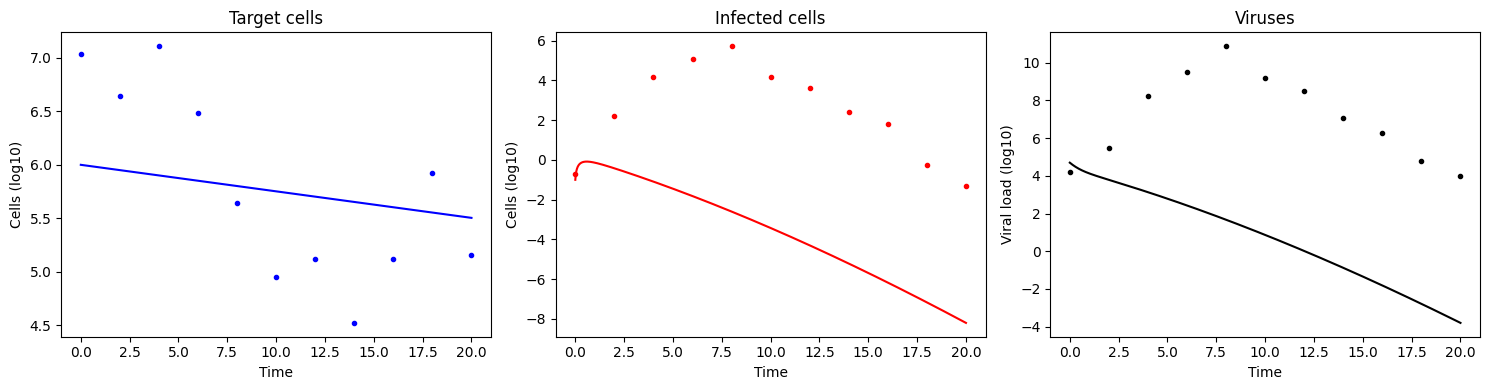

In [21]:
#メイン1

# パラメータの設定（この値を提出）
beta = 7.50e-11 # 7.50e-11, 変えてみる
d = 0.057
delta = 1.807
p = 20000 # 20000, 変えてみる
c = 1.969
x0 = 1.0e+6 # 1.0e+6, 変えてみる
y0 = 0.1
z0 = 50000
epsilon = 0.8 # 0.8, 0〜1, 後で変えてみる
epsilon_start = 1000 # 1000, 〜20, 後で変えてみる

# 計算とプロット（このプロットを提出）
plot_vd(calculate_vd(beta = beta, d = d, delta = delta, p = p, c = c, x0 = x0, y0 = y0, z0 = z0, epsilon = epsilon, epsilon_start = epsilon_start))

### 治療のシミュレーション

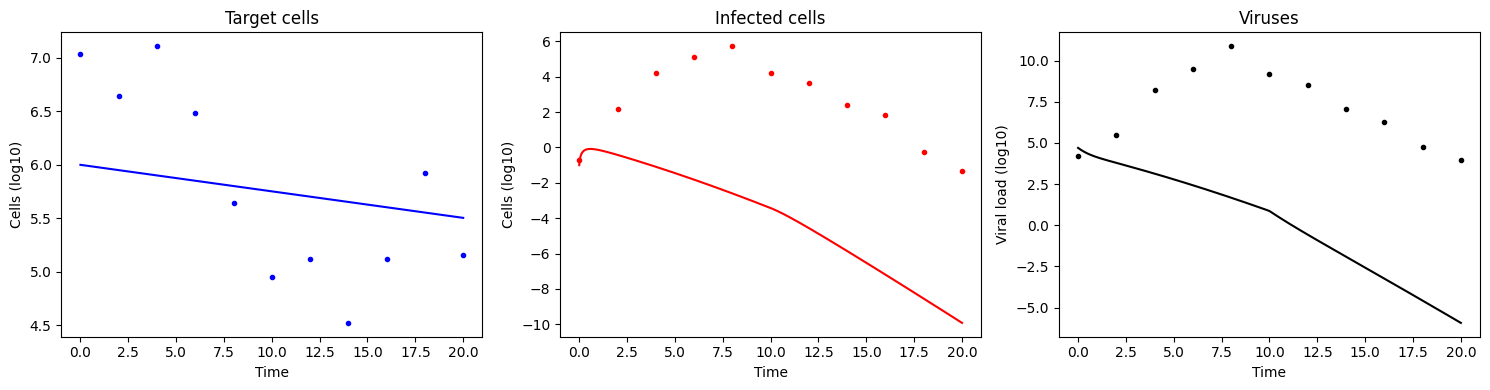

In [24]:
#メイン2

# パラメータの設定
beta = 7.50e-11 # 一つ前の値に変更
d = 0.057
delta = 1.807
p = 20000 # 一つ前の値に変更
c = 1.969
x0 = 1.0e+6 # 一つ前の値に変更
y0 = 0.1
z0 = 50000
epsilon = 0.8 # 0.8, 0〜1, 変えてみる
epsilon_start = 10 # 10, 〜20, 変えてみる

# 計算とプロット
plot_vd(calculate_vd(beta = beta, d = d, delta = delta, p = p, c = c, x0 = x0, y0 = y0, z0 = z0, epsilon = epsilon, epsilon_start = epsilon_start))

### 参考

上記のデータは擬似データですが、以下の論文の内容に基づいています。詳しく知りたい方は参考にしてください。

[https://doi.org/10.3389%2Ffmicb.2012.00319](https://doi.org/10.3389%2Ffmicb.2012.00319)